## 공공데이터포털(data.go.kr)에서 소상공인시장진흥공단_상사(상권)정보

In [ ]:
import pandas as pd
import numpy as np
from konlpy.tag import Okt
from wordcloud import WordCloud
import seaborn as sns
import datetime
from PIL import Image
from collections import Counter
import matplotlib.pyplot as plt
import folium

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')
plt.rc('font', family='NanumGothic')
print(plt.rcParams['font.family'])

['NanumGothic']


In [ ]:
#하나 이상의 csv파일을 로드해서 하나의 dataframe객체로 병합
from glob import glob

file_names= glob('소상공인시장진흥공단_상가(상권)정보_20220630/*.csv')
print(file_names)


['소상공인시장진흥공단_상가(상권)정보_20220630\\소상공인시장진흥공단_상가(상권)정보_강원_202206.csv', '소상공인시장진흥공단_상가(상권)정보_20220630\\소상공인시장진흥공단_상가(상권)정보_경기_202206.csv', '소상공인시장진흥공단_상가(상권)정보_20220630\\소상공인시장진흥공단_상가(상권)정보_경남_202206.csv', '소상공인시장진흥공단_상가(상권)정보_20220630\\소상공인시장진흥공단_상가(상권)정보_경북_202206.csv', '소상공인시장진흥공단_상가(상권)정보_20220630\\소상공인시장진흥공단_상가(상권)정보_광주_202206.csv', '소상공인시장진흥공단_상가(상권)정보_20220630\\소상공인시장진흥공단_상가(상권)정보_대구_202206.csv', '소상공인시장진흥공단_상가(상권)정보_20220630\\소상공인시장진흥공단_상가(상권)정보_대전_202206.csv', '소상공인시장진흥공단_상가(상권)정보_20220630\\소상공인시장진흥공단_상가(상권)정보_부산_202206.csv', '소상공인시장진흥공단_상가(상권)정보_20220630\\소상공인시장진흥공단_상가(상권)정보_서울_202206.csv', '소상공인시장진흥공단_상가(상권)정보_20220630\\소상공인시장진흥공단_상가(상권)정보_세종_202206.csv', '소상공인시장진흥공단_상가(상권)정보_20220630\\소상공인시장진흥공단_상가(상권)정보_울산_202206.csv', '소상공인시장진흥공단_상가(상권)정보_20220630\\소상공인시장진흥공단_상가(상권)정보_인천_202206.csv', '소상공인시장진흥공단_상가(상권)정보_20220630\\소상공인시장진흥공단_상가(상권)정보_전남_202206.csv', '소상공인시장진흥공단_상가(상권)정보_20220630\\소상공인시장진흥공단_상가(상권)정보_전북_202206.csv', '소상공인시장진흥공단_상가(상권)정보_20220630\\소상공인시장진흥공단_상가(상권)정보_제주_202206.

In [ ]:
import pandas as pd
total = pd.DataFrame()
for file_name  in file_names:
    temp = pd.read_csv(file_name, encoding='utf-8')
    total = pd.concat([total, temp])

total.reset_index(inplace=True, drop=True)
print(total.shape)
print(total.info())
print(total.head())


(2363994, 39)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363994 entries, 0 to 2363993
Data columns (total 39 columns):
 #   Column     Dtype  
---  ------     -----  
 0   상가업소번호     int64  
 1   상호명        object 
 2   지점명        object 
 3   상권업종대분류코드  object 
 4   상권업종대분류명   object 
 5   상권업종중분류코드  object 
 6   상권업종중분류명   object 
 7   상권업종소분류코드  object 
 8   상권업종소분류명   object 
 9   표준산업분류코드   object 
 10  표준산업분류명    object 
 11  시도코드       int64  
 12  시도명        object 
 13  시군구코드      int64  
 14  시군구명       object 
 15  행정동코드      int64  
 16  행정동명       object 
 17  법정동코드      int64  
 18  법정동명       object 
 19  지번코드       int64  
 20  대지구분코드     int64  
 21  대지구분명      object 
 22  지번본번지      int64  
 23  지번부번지      float64
 24  지번주소       object 
 25  도로명코드      int64  
 26  도로명        object 
 27  건물본번지      int64  
 28  건물부번지      float64
 29  건물관리번호     object 
 30  건물명        object 
 31  도로명주소      object 
 32  구우편번호      float64
 33  신우편번호      float64
 34  동정보 

In [ ]:
#분석에 필요한 컬럼 추출
data_columns = ['상가업소번호', '상호명','지점명', '상권업종대분류명', '상권업종중분류명', '시도명', '시군구명', '행정동명', '경도', '위도']
data = total[data_columns]
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363994 entries, 0 to 2363993
Data columns (total 10 columns):
 #   Column    Dtype  
---  ------    -----  
 0   상가업소번호    int64  
 1   상호명       object 
 2   지점명       object 
 3   상권업종대분류명  object 
 4   상권업종중분류명  object 
 5   시도명       object 
 6   시군구명      object 
 7   행정동명      object 
 8   경도        float64
 9   위도        float64
dtypes: float64(2), int64(1), object(7)
memory usage: 180.4+ MB
None
     상가업소번호            상호명  지점명 상권업종대분류명   상권업종중분류명  시도명 시군구명  행정동명  \
0  25033300      동그라미중고타이어  NaN       소매  자동차/자동차용품  강원도  강릉시  포남1동   
1  17174549  세인트존스호텔Ohcrab  NaN       숙박      호텔/콘도  강원도  강릉시   초당동   
2  17174079        평창라마다호텔  NaN       숙박      호텔/콘도  강원도  평창군  대관령면   
3  17173904    호텔탑스텐스카이라운지  NaN       숙박      호텔/콘도  강원도  강릉시   옥계면   
4  24412526          레이디가구  NaN       소매       가구소매  강원도  원주시   무실동   

           경도         위도  
0  128.904472  37.770252  
1  128.920908  37.791299  
2  128.717971  37.660051  
3  129.

In [ ]:
data.head()

,상가업소번호,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명,경도,위도
0,25033300,동그라미중고타이어,NaN,소매,자동차/자동차용품,강원도,강릉시,포남1동,128.904472,37.770252
1,17174549,세인트존스호텔Ohcrab,NaN,숙박,호텔/콘도,강원도,강릉시,초당동,128.920908,37.791299
2,17174079,평창라마다호텔,NaN,숙박,호텔/콘도,강원도,평창군,대관령면,128.717971,37.660051
3,17173904,호텔탑스텐스카이라운지,NaN,숙박,호텔/콘도,강원도,강릉시,옥계면,129.052902,37.654680
4,24412526,레이디가구,NaN,소매,가구소매,강원도,원주시,무실동,127.917307,37.327668


In [ ]:
data['상권업종대분류명'].unique()

array(['소매', '숙박', '학문/교육', '음식', '생활서비스', '부동산', '관광/여가/오락', '스포츠'],
      dtype=object)

In [ ]:
#전국 카페 갯수
data.loc[data['상권업종중분류명']=='커피점/카페']

,상가업소번호,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명,경도,위도
13,20778927,키즈까페아이사랑,NaN,음식,커피점/카페,강원도,강릉시,성덕동,128.919456,37.759315
39,20658047,힐링,NaN,음식,커피점/카페,강원도,원주시,단구동,127.958442,37.319958
56,15589162,드롭탑,속초엑스포점,음식,커피점/카페,강원도,속초시,조양동,128.586322,38.191024
83,20762517,상유재카페,NaN,음식,커피점/카페,강원도,정선군,정선읍,128.660805,37.379458
270,20527333,수정다방,NaN,음식,커피점/카페,강원도,고성군,거진읍,128.456166,38.447977
...,...,...,...,...,...,...,...,...,...,...
2363749,18530728,코난,NaN,음식,커피점/카페,충청북도,청주시 상당구,용암1동,127.512973,36.619437
2363844,18538229,디애플,NaN,음식,커피점/카페,충청북도,충주시,연수동,127.940065,36.987402
2363960,18548307,세븐다실,NaN,음식,커피점/카페,충청북도,청주시 청원구,내수읍,127.536971,36.725028
2363965,18547378,몽베르,NaN,음식,커피점/카페,충청북도,제천시,청풍면,128.181539,37.018197


In [ ]:
#전국 카페 개수
df_coffe = data.loc[data['상권업종중분류명']=='커피점/카페']
len(df_coffe)
#전국 스타벅스 데이터
df_coffe.loc[df_coffe["상호명"].str.contains("스타벅스")].reset_index()

,index,상가업소번호,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명,경도,위도
0,2904,25855653,스타벅스강릉안목항점,강릉안목항점,음식,커피점/카페,강원도,강릉시,송정동,128.948709,37.771400
1,6473,12094762,스타벅스춘천후평DT점,춘천후평DT점,음식,커피점/카페,강원도,춘천시,후평3동,127.750622,37.879421
2,8676,20612390,스타벅스,춘천명동점,음식,커피점/카페,강원도,춘천시,약사명동,127.727566,37.880037
3,9764,12449803,스타벅스설악워터피아점,설악워터피아점,음식,커피점/카페,강원도,속초시,영랑동,128.527867,38.207735
4,10469,25494767,스타벅스,원주터미널점,음식,커피점/카페,강원도,원주시,무실동,127.931104,37.343852
...,...,...,...,...,...,...,...,...,...,...,...
1500,2341225,25411540,스타벅스,청주율량DT점,음식,커피점/카페,충청북도,청주시 청원구,율량.사천동,127.492934,36.666270
1501,2345569,22559276,스타벅스,충주연수점,음식,커피점/카페,충청북도,충주시,연수동,127.939912,36.982734
1502,2348325,20128548,스타벅스,NaN,음식,커피점/카페,충청북도,음성군,원남면,127.654434,36.876466
1503,2355684,17856869,스타벅스,NaN,음식,커피점/카페,충청북도,제천시,청전동,128.210619,37.146806


In [ ]:
data.시도명.unique()

array(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도',
       '충청남도', '충청북도'], dtype=object)

In [ ]:
#서울에 있는 카페 변수 저장
soul_coffe=data.loc[(data['시도명']=='서울특별시')&(data['상권업종중분류명']=='커피점/카페')]
len(soul_coffe)

20092

In [ ]:
#서울 스타벅스 갯수
soul_coffe=soul_coffe[soul_coffe["상호명"].str.contains("스타벅스")].reset_index()
467

467

In [ ]:
soul_coffe['시군구명'].value_counts()

강남구     76
중구      42
서초구     38
송파구     33
종로구     28
영등포구    28
마포구     26
용산구     18
광진구     16
서대문구    16
강서구     16
성북구     15
강동구     13
양천구     13
관악구     11
동작구     11
노원구     11
금천구     11
구로구     10
동대문구     9
은평구      6
중랑구      6
성동구      5
강북구      5
도봉구      2
Name: 시군구명, dtype: int64

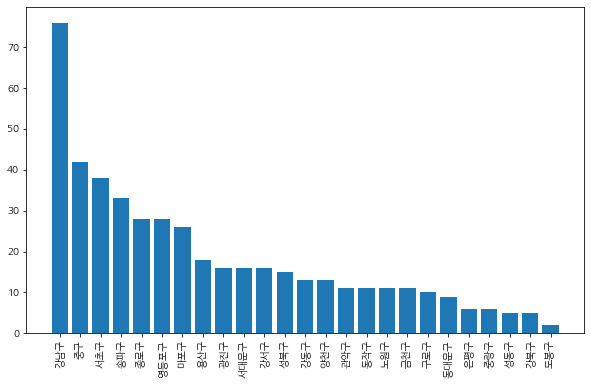

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(soul_coffe['시군구명'].value_counts().index,
       soul_coffe['시군구명'].value_counts().values)
plt.xticks(rotation= 'vertical')
plt.show()
plt.savefig('starbucks_plot.png')

In [ ]:
soul_coffe = soul_coffe.drop(soul_coffe.iloc[:,[0]],axis=1)

## 서울시 스타벅스 시각화

In [ ]:

soul_coffe_map = soul_coffe[['지점명', '위도', '경도']]


let= soul_coffe['위도'].mean()
get= soul_coffe['경도'].mean()

center = [let,get]
m = folium.Map(location=center, zoom_start=12)

# 1000 개의 데이터만 그려냅니다.
for i in soul_coffe_map.index:
    folium.Marker(
        location = soul_coffe_map.loc[i, ['위도', '경도']].values.tolist(),
        tooltip = soul_coffe_map.loc[i, '지점명'],
        radius = 1
    ).add_to(m)
m